In [1]:
#import standard libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['xtick.labelsize']=20
matplotlib.rcParams['ytick.labelsize']=20
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['legend.fontsize']=20
matplotlib.rcParams['axes.labelsize']=20
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
matplotlib.rc('text',usetex=True)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
data_1 =  np.load('diffcoeff_50628659.npy')
data_2 =  np.load('diffcoeff_50630218.npy')
data_3 =  np.load('diffcoeff_50630219.npy')

print(np.shape(data_1))
print(data_1[2,:])

(4, 40)
[0.68082873 0.5066772  0.38050624 0.36676249 0.29610262 0.37730838
 0.27461491 0.22055074 0.24805966 0.22467262 0.19252595 0.20292174
 0.1750027  0.19970083 0.15455378 0.13686562 0.16865826 0.14702055
 0.14484254 0.11123998 0.12534969 0.12174499 0.12207352 0.12593067
 0.10497203 0.08242588 0.1048741  0.08964708 0.09023488 0.07827125
 0.07554617 0.07160333 0.08458059 0.09010728 0.06630702 0.05693472
 0.05914977 0.06356029 0.06583903 0.05773513]


In [3]:
#Averaging of the data

rep = data_1[1,:]

all_data = np.array([data_1[2,:], data_2[2,:], data_3[2,:]])
msd_traj_m = np.mean(all_data, axis=0)
msd_traj_s = np.std(all_data, axis=0, ddof=1)

all_data = np.array([data_1[3,:], data_2[3,:], data_3[3,:]])
msd_m = np.mean(all_data, axis=0)
msd_s = np.std(all_data, axis=0, ddof=1)
               
print(msd_m)
print(msd_s)

[0.7425422  0.50983962 0.42190014 0.33536967 0.30163158 0.29689698
 0.2557868  0.23974565 0.22104698 0.20301576 0.19520848 0.19817709
 0.19341652 0.17417766 0.16561382 0.14595403 0.15217028 0.14650495
 0.14900065 0.13781152 0.11758084 0.11843796 0.11862609 0.11871299
 0.10973809 0.09032678 0.09182426 0.10248252 0.0976486  0.09228522
 0.07324471 0.07965414 0.07690771 0.08237294 0.0735431  0.06070481
 0.05689461 0.0706877  0.06600283 0.05886977]
[0.06341586 0.0286566  0.01985352 0.01020805 0.01685729 0.00543089
 0.00896858 0.00820451 0.01291647 0.01802452 0.01677733 0.01466416
 0.01550069 0.01426073 0.007321   0.00521384 0.00548479 0.01423055
 0.00790687 0.00560667 0.00487664 0.00428493 0.0059962  0.00246004
 0.00360405 0.01057321 0.00130583 0.0002528  0.00328336 0.00931622
 0.00561952 0.00408779 0.00245022 0.00597664 0.00432629 0.00430657
 0.0008195  0.00267031 0.00359602 0.00216002]


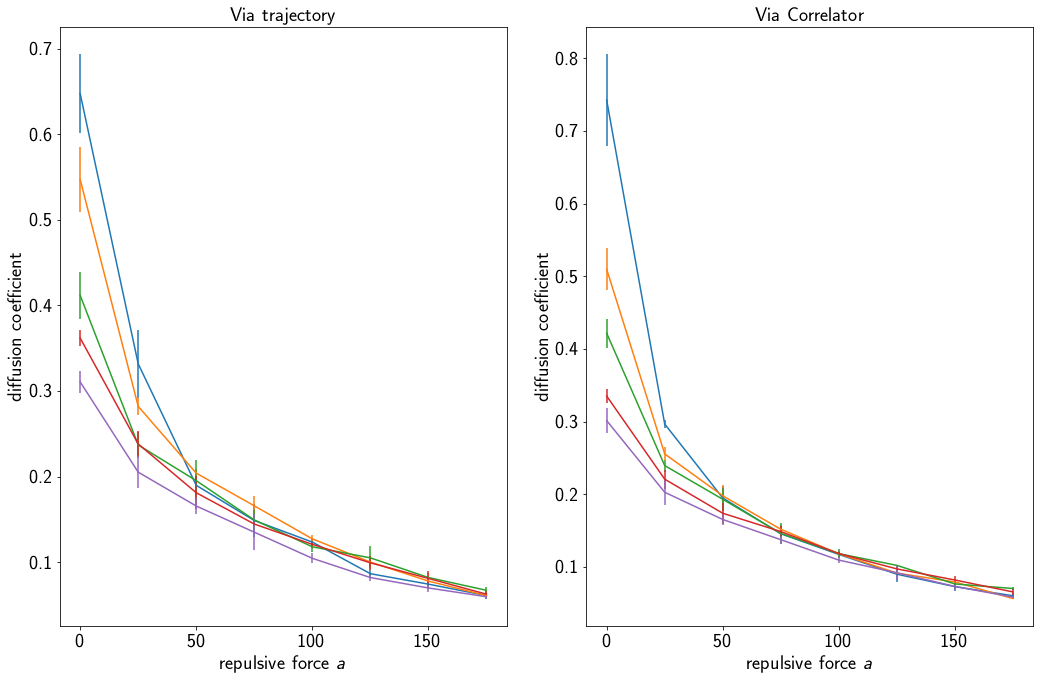

In [4]:
plt.figure(figsize=(15,10))
    
selection = [0, 5, 10, 15, 20, 25, 30, 35]
selection = np.array(selection)

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for i in range(5):
    ax1.errorbar(rep[selection], msd_traj_m[selection], yerr=msd_traj_s[selection])
    ax2.errorbar(rep[selection], msd_m[selection], yerr=msd_s[selection])
    selection += 1

size = 20

ax1.set_title("Via trajectory", fontsize = size)
ax1.set_xlabel("repulsive force $a$", fontsize = size)
ax1.set_ylabel("diffusion coefficient", fontsize = size)

ax2.set_title("Via Correlator", fontsize = size)
ax2.set_xlabel("repulsive force $a$", fontsize = size)
ax2.set_ylabel("diffusion coefficient", fontsize = size)

plt.tight_layout()
#plt.savefig("diff_msd.pdf")

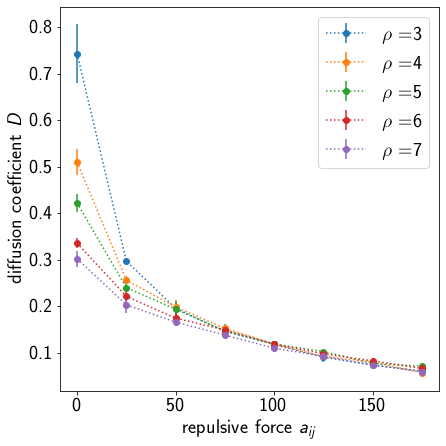

In [5]:
plt.figure(figsize=(2*3.375,2*3.375))
    
selection = [0, 5, 10, 15, 20, 25, 30, 35]
rho = [3, 4, 5, 6, 7]
selection = np.array(selection)

ax1 = plt.subplot(111)

for i in range(5):
    ax1.errorbar(rep[selection], msd_m[selection], yerr=msd_s[selection], 
                 marker='o', 
                 linestyle=':', 
                 #linewidth=0.0, 
                 label = r"$\rho =$" + str(rho[i]))
    selection += 1

size = 20

ax1.set_xlabel("repulsive force $a_{ij}$", fontsize = size)
ax1.set_ylabel("diffusion coefficient $D$", fontsize = size)
ax1.legend(fontsize=size)

plt.tight_layout()
#plt.savefig("diff_msd.pdf")